# NumPy
- *No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers.*
- *NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python.*
https://jakevdp.github.io/PythonDataScienceHandbook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1, 3])
print(x.shape, x.ndim)

## The NumPy array `ndarray`
> - Eficiencia de memoria e tempo de execução<br>
- C data types https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html
- Os arrays são *hiper-retangulares* (n-orthotopes)

In [ ]:
import math
import random
import sys

In [ ]:
n = int(1e7);
random.seed(0)   # dar semente fixa ao gerador de numeros aleatórios para gerar sempre a mesma sequencia de numeros
mylist = [random.randrange(1,100) for _ in range(n)]
#print('mylist has {} elements and uses {} bytes'.format(len(mylist),sys.getsizeof(mylist)))
print(f'mylist has {len(mylist)} elements and uses {sys.getsizeof(mylist)} bytes')


In [ ]:
# Operating on a list
def mylog(lista):
    for idx, val in enumerate(lista):
        lista[idx] = math.log10(val)
    return lista

%timeit mylog(mylist.copy())

In [ ]:
# The NumPy way...
mynda = np.array(mylist, dtype='uint8')   # creando um ndarray a partir duma list
print(type(mynda), mynda.shape, mynda.dtype, mynda.nbytes)

%timeit np.log10(mynda)



### Creando ndarrays manualmente
>- Criar a partir de listas (dtype para escolher tipo de dados)
- zeros, ones (criar arrays com todos os elementos de valor 0, ou 1)
- linspace (criar arrays de valores espaciados uniformemente entre dois valores)
- random (criar arrays com valores aleatórios de distintas distribuições de probabilidade)

### Attributes
> Os ndarrays também som objetos, e tem atributos como `shape`, `size`, `ndim`, `dtype`...

In [ ]:
mylis = [[[1, 5, 3], [2, 4, 1]], [[34, 4, 2], [3, 7, 0]]]
x = np.array(mylis)
print(x)
print('Atributos de x: ', x.dtype, x.shape, x.size, x.ndim)


In [ ]:
y = np.zeros((4, 6))
print(y)
z = np.ones(3)
print(z)
doido = np.random.normal(0,1,15)   # aleatorios com distribuição normal
print(doido.shape, doido)

In [ ]:
x = np.arange(-10, 10)    # como o range, mas cria um ndarray em vez duma lista
print(x)

### Concatenating and splitting ndarrays
> - numpy.concatenate(), numpy.stack()
- numpy.split()

In [ ]:
a = np.ones((4, 4))
b = np.arange(16).reshape((4, 4))
c = np.concatenate((a, b))
print(c)
print(c.shape)

In [ ]:
c = np.concatenate((a, b), axis=1)    # pode especificar em qual dimensão fazer a concatenação
#c = np.stack((a, b), axis=2)
print(c.shape, c, sep='\n')

## Universal Functions (ufuncs)
> Métodos e funções que operam eficientemente em todos os elementos dum ndarray ao mesmo tempo (roubado do Matlab?)

In [ ]:
x = np.arange(0,20).reshape(5,4)   # reshape muda o shape do array (as dimensões tem que bater)
print(x)

# Tem as operações aritméticas como ufuncs
print(-x)
print(x+10)
print(x**2)
print(x+x)  # soma elemento por elemento

In [ ]:
# Outras funções matemáticas
x = np.linspace(0,4*math.pi,100)
y = np.sin(x)    # ufunc
plt.plot(x,y)

In [ ]:
x = np.ones((3,3))
y = x*4
z = x+y
print(x.shape, y.shape, z.shape)



### Broadcasting
> Usando ufuncs em arrays com tamanho diferente
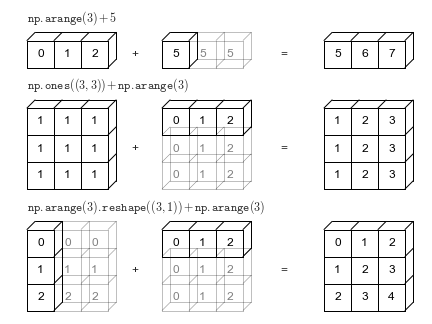
Ver regras em: https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

In [ ]:
a = np.arange(5)
print(a)
print(a - 5)    # propagando a subtração do escalar no array a

In [ ]:
a = np.ones((4,4))
print(a * np.array([1, 2, 3, 4]))   # propagando o produto do array menor no array maior

## Indexando
> Selecionando partes de ndarrays<br>
Como nos `list`, podemos mudar o conteúdo de elementos dum `ndarray` pois são mutáveis 

### Selecionando um único elemento (*indexing*)

In [ ]:
np.random.seed(0)
x = np.random.randint(0, 10, (5, 10))
print(x)

#print(x[0,2])
#x[0,2] = -2
#print(x)

xa = x[1,3]   # accesar um elemento único (indexing) cria uma copia com o valor do elemento
print(type(xa), xa)

xa = -9
print(x)      # portanto mudar o valor dela não muda o array original


### Selecionando pedaços (*slicing*)
> Selecionar hiperretangulos (slicing) gera *views* do array original, o que é útil para não duplicar dados na memória. Os outros jeitos de indexar geram copias.<br>
https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/

In [ ]:
np.random.seed(0)
x = np.random.randint(0, 10, (10, 5))
print(x)

#print(x[::2,:])

xa = x[0:3,:]
#xa = x[0:3,:].copy()    # para fazer copia em vez de view
#print(type(xa), xa)

# Slicing não copia o array, faz um 'view' ao array original
# Portanto mudar os valores do slice muda os do original
xa[0,0] = 666
print(x)

xa *= -1
print(x)

# Mas escrito deste outro jeito cria uma copia!
xa = -xa
#xa = np.ones((2,5))
print(xa)
print(x)


### Selecionando elementos por lógicas (*boolean masks*)
> Podemos detectar quais elementos dum array satisfazem alguma condição... <br>
... e ficar só com aqueles elementos (*boolean mask*)

Nota: `and` and `or` perform a single Boolean evaluation on an entire object, while `&` and `|` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.

In [ ]:
x = np.random.randint(-20,20,(5,5))
xs = x > 0   # aqui o > está funcionando como ufunc 
print(x, xs, sep = '\n')

xm = x[xs]   # aqui tô usando uma máscara lógica para selecionar elementos
print(np.sum(xs), xm)

In [ ]:
print(x)
print(x[(x > 0) & (x < 10)])    # Para fazer operações lógicas como ufunc tem que usar &,| e agrupar com ()

print(x[(x > 0) and (x < 10)])    # and, or não funciona

### Selecionando elementos de jeitos doidos (*fancy indexing*)

### Importando dados como ndarray
> - `genfromtxt`

## O que tem a mais no NumPy?
> - Algebra linear (https://numpy.org/devdocs/reference/routines.linalg.html)
- Fourier (https://numpy.org/devdocs/reference/routines.fft.html)
- Estatística descritiva (https://numpy.org/devdocs/reference/routines.statistics.html)